# Section 1: Extracting raw data from ECB_Vendor_Violations.csv

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

In [2]:
#Basic command to import the CV
ManhattanDF = pd.read_csv('ECB_Vendor_Violations.csv')
ManhattanDF.shape

D:\Anaconda3\envs\env_full\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9107, 78)

In [3]:
ManhattanDF.head()

,Ticket Number,Violation Date,Violation Time,Issuing Agency,Respondent Last Name,Respondent First Name,Balance Due,Violation Location (Borough),Violation Location (Block No.),Violation Location (Lot No.),...,Charge #8: Code Description,Charge #8: Infraction Amount,Charge #9: Code,Charge #9: Code Section,Charge #9: Code Description,Charge #9: Infraction Amount,Charge #10: Code,Charge #10: Code Section,Charge #10: Code Description,Charge #10: Infraction Amount
0,890016371,07/08/2013,13:27:00,DOH MENTAL HEALTH,GUAMAM NARSISA,NaN,1000.0,MANHATTAN,1532.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,890016380,07/08/2013,13:27:00,DOH MENTAL HEALTH,GUAMAM NARSISA,NaN,1000.0,MANHATTAN,1532.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,890016591,06/10/2013,13:00:00,DOH MENTAL HEALTH,HUSSAIN MOHAMMED,NaN,50.0,MANHATTAN,196.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,890017820,05/02/2013,12:18:00,DOH MENTAL HEALTH,ALMONTE AGUSTINA,NaN,1000.0,MANHATTAN,2139.0,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,890005876,03/08/2013,11:28:00,DOH MENTAL HEALTH,ADEL ELEISH,NaN,0.0,MANHATTAN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extract the data we're interested in
Loc_Block = ManhattanDF['Violation Location (Block No.)'].values
Time = ManhattanDF['Violation Time'].values
Loc_Lot = ManhattanDF['Violation Location (Lot No.)'].values

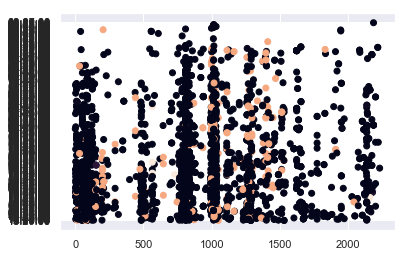

In [5]:
plt.scatter(Loc_Block, Time, c=Loc_Lot)

# Section 2: Fitting the data for the attributes block number and lot number

In [6]:
#Some of the values in the csv either have no data or a value that's too much.
#These codes eliminate that error so the .fit can work
Loc_Block = Loc_Block[np.logical_not(np.isnan(Loc_Block))]
Loc_Lot = Loc_Lot[np.logical_not(np.isnan(Loc_Lot))]
BNL = np.array(list(zip(Loc_Block,Loc_Lot))).reshape(len(Loc_Block),2)
kmeans = KMeans(n_clusters=5)
kmeans.fit(BNL)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

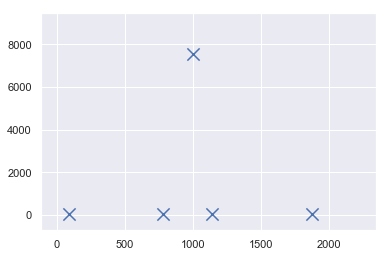

In [8]:
i=0
for i in range(len(BNL)):
    plt.plot(BNL[i][0],BNL[i][1], markersize = 10)
plt.scatter(centroids[:,0],centroids[:,1],marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

In [9]:
#Removes the : symbol from the time str's giving us a list array
for i in range(len(Time)):
    Time[i]=Time[i].split(':')
print(Time[0])

['13', '27', '00']


In [10]:
#Using another array, time corrected, given the time of day.
#Having the time as a hh/mm/ss makes it easier to manipulate, and the graphs look nicer.
Time_Cor = np.ones(len(Time))
for k in range(len(Time)):
    Time_Cor[k]= Time[k][0]+Time[k][1]+Time[k][2]
    print(Time_Cor[k])

132700.0
132700.0
130000.0
121800.0
112800.0
153900.0
140000.0
141900.0
141900.0
141900.0
132300.0
144400.0
110100.0
123000.0
160900.0
100100.0
154900.0
150600.0
150600.0
150600.0
151500.0
151500.0
151500.0
151500.0
120300.0
145400.0
115700.0
115700.0
133900.0
133900.0
145700.0
84200.0
84200.0
110900.0
110900.0
111900.0
111900.0
111900.0
113300.0
101300.0
101300.0
85800.0
105500.0
111400.0
111400.0
152200.0
93500.0
93500.0
110400.0
110400.0
141400.0
92600.0
143000.0
112400.0
153900.0
95200.0
92600.0
92600.0
120000.0
120000.0
93100.0
93100.0
120000.0
134000.0
100100.0
152000.0
142000.0
114400.0
175500.0
182500.0
135000.0
120000.0
183000.0
162000.0
140000.0
131500.0
145500.0
131500.0
155500.0
114100.0
140500.0
163500.0
143700.0
155700.0
163500.0
124500.0
101000.0
162000.0
162000.0
181000.0
0.0
162000.0
80400.0
152500.0
171800.0
171000.0
182000.0
185600.0
14500.0
190500.0
182000.0
140500.0
165400.0
114500.0
160000.0
124000.0
122500.0
144300.0
150000.0
151000.0
160100.0
164700.0
124600.0
1

193500.0
193500.0
80500.0
150000.0
132100.0
160300.0
43000.0
240000.0
115900.0
122000.0
180000.0
110200.0
193000.0
143000.0
125300.0
134400.0
183300.0
124500.0
183600.0
180500.0
152500.0
152500.0
91500.0
194000.0
180500.0
114700.0
154600.0
170500.0
160000.0
142500.0
155200.0
152000.0
171500.0
120500.0
161500.0
122000.0
135500.0
90000.0
140000.0
165000.0
114500.0
114500.0
125000.0
125000.0
182000.0
151000.0
151000.0
124500.0
135500.0
123500.0
123500.0
123500.0
140000.0
151000.0
140000.0
145500.0
145500.0
145500.0
115000.0
115000.0
115000.0
123900.0
132200.0
151500.0
144900.0
151500.0
144900.0
134000.0
134000.0
134000.0
124300.0
131000.0
151000.0
163500.0
193000.0
175000.0
174000.0
195000.0
170500.0
125500.0
125500.0
120900.0
160500.0
114000.0
151500.0
151500.0
133500.0
124800.0
151500.0
171000.0
171000.0
170500.0
170500.0
105500.0
182800.0
144400.0
130600.0
143000.0
143000.0
174500.0
152500.0
154400.0
155600.0
131300.0
144000.0
134000.0
72500.0
134000.0
151500.0
152500.0
160000.0
83000.

173200.0
144500.0
160000.0
110500.0
141400.0
113500.0
152700.0
141000.0
141000.0
155800.0
155800.0
114000.0
162400.0
142500.0
144500.0
150600.0
183400.0
184000.0
195500.0
192500.0
0.0
181200.0
170000.0
161500.0
174500.0
161500.0
165000.0
181000.0
181000.0
141000.0
140000.0
142000.0
181300.0
171700.0
162200.0
132800.0
162300.0
170000.0
194000.0
150800.0
81500.0
192000.0
192000.0
91000.0
170700.0
143000.0
170500.0
172800.0
133400.0
165200.0
173500.0
152000.0
150000.0
154700.0
154700.0
134100.0
102800.0
105700.0
15700.0
115800.0
124000.0
93400.0
175200.0
83000.0
103000.0
195500.0
150900.0
144000.0
133300.0
130800.0
181000.0
191000.0
192500.0
163300.0
130000.0
140000.0
150400.0
150400.0
145000.0
171200.0
192100.0
161000.0
193800.0
173000.0
140000.0
181500.0
150400.0
181000.0
171800.0
163500.0
163000.0
182500.0
180500.0
185600.0
135000.0
145500.0
130500.0
124300.0
121000.0
124400.0
124400.0
122900.0
122900.0
124500.0
124500.0
150000.0
150000.0
150000.0
110500.0
110300.0
110300.0
143000.0
15

130000.0
140000.0
140000.0
150000.0
142500.0
145000.0
150000.0
172000.0
130000.0
135500.0
170400.0
165800.0
165000.0
153000.0
154000.0
164500.0
190000.0
162500.0
182500.0
171500.0
110000.0
121000.0
131400.0
132500.0
194000.0
193500.0
112500.0
131200.0
122400.0
80000.0
133000.0
135000.0
143000.0
131500.0
132500.0
142000.0
133000.0
175000.0
142500.0
140000.0
141500.0
155000.0
141500.0
150000.0
135800.0
134500.0
135100.0
153000.0
135500.0
135500.0
135500.0
151500.0
130000.0
134500.0
134700.0
132500.0
151600.0
151500.0
151500.0
182200.0
182000.0
133900.0
143500.0
142500.0
133000.0
153000.0
131500.0
181000.0
113000.0
173000.0
131000.0
132000.0
125500.0
130000.0
152000.0
123000.0
135000.0
132100.0
132500.0
125600.0
144000.0
133500.0
132500.0
132500.0
144000.0
144000.0
160500.0
160500.0
192500.0
160000.0
183500.0
93500.0
113000.0
112000.0
135000.0
65000.0
65000.0
65000.0
65000.0
101000.0
132400.0
131400.0
132500.0
123000.0
154500.0
152700.0
131000.0
160500.0
133000.0
132200.0
132400.0
125600.

155500.0
155500.0
135500.0
90100.0
193000.0
155500.0
182300.0
183000.0
185500.0
184500.0
140000.0
180000.0
181500.0
143000.0
133000.0
140500.0
151500.0
144400.0
172000.0
80700.0
133000.0
131000.0
131000.0
101500.0
134000.0
60000.0
60000.0
14500.0
14500.0
4000.0
62000.0
122000.0
65000.0
133500.0
154100.0
141100.0
152000.0
150800.0
150900.0
0.0
114700.0
140000.0
140000.0
175000.0
143000.0
154000.0
132000.0
141000.0
143000.0
140000.0
170500.0
90000.0
84500.0
94000.0
172900.0
160000.0
193000.0
120200.0
110000.0
101500.0
162600.0
170300.0
161900.0
165100.0
182000.0
174000.0
154500.0
115700.0
133200.0
133500.0
123600.0
123900.0
134500.0
142800.0
163300.0
141000.0
155100.0
161000.0
161900.0
172500.0
165900.0
163300.0
130500.0
0.0
132500.0
132500.0
180000.0
163000.0
133000.0
144000.0
191000.0
161500.0
162000.0
173000.0
142000.0
120000.0
90000.0
90000.0
153000.0
85500.0
85500.0
184000.0
193000.0
182000.0
180000.0
184500.0
181500.0
170000.0
154500.0
181500.0
181000.0
80000.0
80000.0
151000.0
193

163000.0
61000.0
53000.0
70000.0
71000.0
113000.0
104500.0
140000.0
62000.0
191000.0
143000.0
60000.0
54500.0
144500.0
160500.0
161000.0
81000.0
91500.0
134200.0
144900.0
163000.0
163000.0
121500.0
141500.0
162000.0
123300.0
141100.0
123000.0
105100.0
105100.0
131300.0
164500.0
122000.0
115500.0
105000.0
180000.0
164000.0
95800.0
112700.0
142500.0
145200.0
133900.0
150100.0
145400.0
143000.0
120500.0
85300.0
122300.0
141800.0
130300.0
104100.0
195900.0
101100.0
123500.0
152000.0
130600.0
95400.0
142100.0
122000.0
80200.0
103700.0
130000.0
123000.0
101400.0
103200.0
120100.0
104300.0
115600.0
180200.0
102300.0
131800.0
101000.0
94800.0
125000.0
92900.0
111800.0
94100.0
132700.0
100100.0
122300.0
145800.0
141800.0
113200.0
131600.0
82300.0
121900.0
81500.0
154300.0
104600.0
94600.0
142000.0
134000.0
131200.0
151600.0
85300.0
100600.0
195900.0
103400.0
112400.0
131700.0
135500.0
135500.0
102000.0
142100.0
140900.0
143700.0
123800.0
161100.0
100400.0
102900.0
105100.0
84200.0
150300.0
1234

114700.0
101200.0
95700.0
121100.0
151200.0
133100.0
113000.0
181300.0
193000.0
81000.0
180500.0
84500.0
102100.0
115000.0
133000.0
111000.0
135100.0
125000.0
120200.0
120000.0
10000.0
173500.0
173500.0
183000.0
183200.0
172000.0
91200.0
175500.0
144500.0
160000.0
131500.0
163400.0
133000.0
154500.0
105700.0
141000.0
83000.0
133000.0
144100.0
134200.0
184500.0
183800.0
154000.0
162300.0
164000.0
185000.0
190500.0
184000.0
150000.0
104500.0
143000.0
141000.0
151300.0
152000.0
141100.0
143000.0
140000.0
113000.0
185500.0
165000.0
163000.0
130800.0
184500.0
184500.0
101500.0
50000.0
31500.0
154500.0
132800.0
80000.0
190000.0
101000.0
190000.0
80500.0
175000.0
191000.0
175200.0
175200.0
92500.0
400.0
1300.0
110000.0
113000.0
104500.0
104500.0
181800.0
195100.0
81200.0
84000.0
83000.0
192200.0
192200.0
80000.0
80000.0
80000.0
193500.0
85000.0
185000.0
85000.0
170500.0
175500.0
194500.0
194500.0
91200.0
175500.0
171000.0
165000.0
175000.0
191500.0
174000.0
174500.0
110000.0
193000.0
190500.0

183000.0
150000.0
180500.0
193500.0
154000.0
143500.0
154800.0
195100.0
150000.0
80000.0
191900.0
145000.0
162200.0
162000.0
162000.0
150200.0
175500.0
114500.0
182300.0
160100.0
83100.0
83100.0
183800.0
165900.0
160300.0
120600.0
170800.0
125500.0
132200.0
174500.0
164000.0
133000.0
144800.0
145000.0
174700.0
144000.0
194200.0
53000.0
81500.0
114500.0
114000.0
140000.0
140000.0
170500.0
143500.0
161000.0
82000.0
150500.0
135500.0
114500.0
71000.0
120000.0
103000.0
120000.0
54000.0
54500.0
62000.0
93000.0
82000.0
113000.0
171500.0
182000.0
182500.0
154000.0
155000.0
160000.0
91500.0
71500.0
71500.0
112300.0
112300.0
113500.0
190000.0
190000.0
190500.0
51000.0
145400.0
141000.0
144900.0
180000.0
153700.0
152000.0
142000.0
153500.0
121000.0
110500.0
120500.0
110000.0
143500.0
145500.0
112500.0
115500.0
112000.0
142500.0
132800.0
160000.0
152900.0
130000.0
175500.0
35000.0
171800.0
171800.0
160800.0
42000.0
121500.0
163600.0
143000.0
143000.0
190000.0
192500.0
91500.0
182000.0
124400.0
18

83100.0
112000.0
103000.0
194000.0
192500.0
171900.0
121000.0
154500.0
140000.0
182300.0
162600.0
155900.0
164100.0
130000.0
132700.0
151800.0
152100.0
135700.0
115400.0
140000.0
112300.0
122400.0
103400.0
175800.0
144000.0
154500.0
145500.0
153000.0
35000.0
94000.0
112000.0
173000.0
150000.0
140000.0
110000.0
10000.0
12000.0
10000.0
114000.0
80000.0
131500.0
133000.0
153000.0
101000.0
10000.0
10000.0
103000.0
112100.0
104000.0
103000.0
171500.0
140000.0
80000.0
150000.0
150000.0
153000.0
102000.0
54000.0
81500.0
94500.0
160000.0
112000.0
160500.0
93000.0
94200.0
123500.0
123500.0
123500.0
160000.0
125000.0
125000.0
132500.0
132700.0
140000.0
140100.0
143400.0
144000.0
144000.0
140500.0
145500.0
145500.0
144500.0
144500.0
151500.0
154500.0
161500.0
135000.0
161500.0
164500.0
164000.0
163000.0
145500.0
133000.0
133500.0
145000.0
150000.0
161500.0
161500.0
143300.0
144000.0
154000.0
122500.0
143800.0
143800.0
143800.0
162000.0
161500.0
161500.0
152700.0
143700.0
143700.0
143700.0
143700.

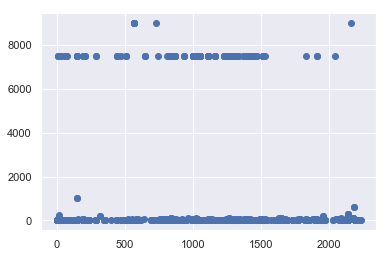

In [11]:
#In order to double check the density equations one might use the make_blob command
X = BNL
y = Time_Cor
centers = centroids
plt.scatter(X[:,0], X[:,1])
plt.show()

# Section 2.5: Applying a kernal denstiy algothrim on the data

In [12]:
#The mean shift command using to find the center, or maxima, of a density cluster
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

['r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.', 'r.', 'g.', 'b.', 'c.', 'k.']
[0 0 0 ... 0 0 0]


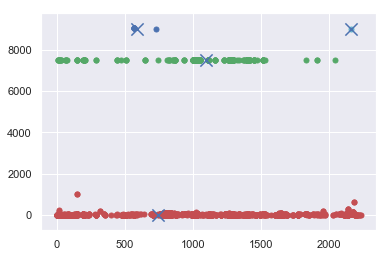

In [13]:
# Using the colors and the for loop were obtained by youtuber "sentdex"
# https://youtu.be/ZS-IM9C3eFg


colors = 10*['r.','g.','b.','c.','k.']
print(colors)
print(labels)
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker="x", s=150, linewidths = 5, zorder=10)
plt.show()

# Section 3:Testing the Algorithm by Fitting Block Number and Time on Test Data

In [14]:
#Testing the method on a smaller portion of the data
Time_Cor_Second = Time_Cor[1000:2000]
Loc_Block_Second = Loc_Block[1000:2000]

Text(0.5,1,'Time Vs. Block Location')

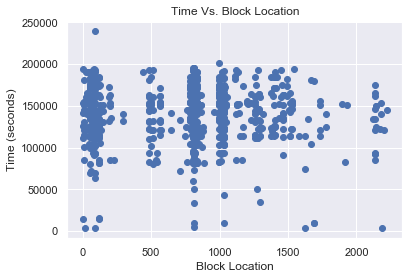

In [15]:
#Graphing the time as hhmmdd
plt.scatter(Loc_Block_Second, Time_Cor_Second)
plt.ylabel('Time (seconds)')
plt.xlabel('Block Location')
plt.title('Time Vs. Block Location')

In [16]:
#Fitting The time, and the Block Location
BTL = np.array(list(zip(Loc_Block_Second,Time_Cor_Second))).reshape(len(Loc_Block_Second),2)
kmeans = KMeans(n_clusters=2)
kmeans.fit(BTL)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
#obtained from googling how to use kmeans
centroids = kmeans.cluster_centers_
L = kmeans.labels_

In [18]:
#Testing to make sure the values are somewhat accurate
#print(centroids)
#print(L)

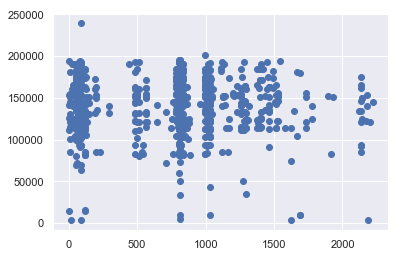

In [19]:
#This is the fitted data by the machine
Z = BTL
#We didn't specify a center, because we are hoping the machine will do it
plt.scatter(Z[:,0], Z[:,1])
plt.show()

# Section 4: Kernel Density Estimation on Test Data

In [20]:
ms = MeanShift()
ms.fit(Z)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

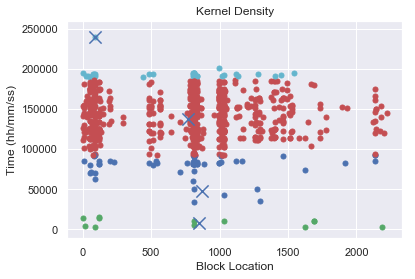

In [21]:
L = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(L))
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
#print(colors)
#print(L)
for i in range(len(Z)):
    plt.plot(Z[i][0],Z[i][1], colors[L[i]], markersize = 10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker="x", s=150, linewidths = 5, zorder=10)
plt.ylabel('Time (hh/mm/ss)')
plt.xlabel('Block Location')
plt.title('Kernel Density')
plt.show()

In [22]:
#The clusters represents the frequency of getting issued a ticket around that location given the time of day.
print(cluster_centers)

[[7.71477860e+02 1.37353137e+05]
 [8.49333333e+02 8.50833333e+03]
 [8.74428571e+02 4.78571429e+04]
 [8.80000000e+01 2.40000000e+05]]


# Section 5: Kernel Density Estimation on full data set

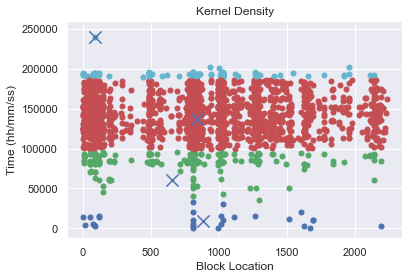

In [23]:
#Same procedure as above, but now we're using all of the data
BTL_Total = np.array(list(zip(Loc_Block,Time_Cor))).reshape(len(Loc_Block),2)
kmeans = KMeans(n_clusters=4)
kmeans.fit(BTL_Total)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

ms = MeanShift()
ms.fit(BTL_Total)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
#print(colors)
#print(labels)
for i in range(len(BTL_Total)):
    plt.plot(BTL_Total[i][0],BTL_Total[i][1], colors[labels[i]], markersize = 10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker="x", s=150, linewidths = 5, zorder=10)
plt.ylabel('Time (hh/mm/ss)')
plt.xlabel('Block Location')
plt.title('Kernel Density')
plt.show()

In [24]:
print(cluster_centers)

[[8.42082854e+02 1.36997641e+05]
 [6.56655172e+02 6.09413793e+04]
 [8.85153846e+02 8.91153846e+03]
 [8.80000000e+01 2.40000000e+05]]
